# Insight Into Boston and Seattle Airbnb Data

## CRISP-DM Process (Cross-Industry Standard Process for Data Mining)

In [1]:
%%html
<a href="https://medium.com/@patelkushal96/insight-into-boston-and-seattle-airbnb-data-d7175240df66?source=friends_link&sk=08a6c02a44b4d6849ae3dcd00eaa6b97">Medium blog can be found by clicking here.</a>

<B>Business Understanding</B>: From the datasets which is given by Airbnb, it is tried to provide more insights for business owners on market prices and how to improve customer experience. To deep dive into the dataset, the following steps are followed.

- <B>Data Understanding</B>

- <B>Data Preparation</B>

- <B>Data Modeling</B> 

- <B>Results and conclusion</B>

There are three business aspect questions to be analysed: 


1. How Boston and Seattle Airbnb price behaves with the time?
2. What are the most important features which affect Airbnb rental price?
3. What are important amenities people need the most?


In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import date
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# import datasets
listings_Boston = pd.read_csv("listings_Boston.csv")
listings_Seattle = pd.read_csv("listings_Seattle.csv")
reviews_Boston = pd.read_csv("reviews_Boston.csv")
reviews_Seattle = pd.read_csv("reviews_seattle.csv")
calender_Boston = pd.read_csv("calender_Boston.csv")
calender_Seattle = pd.read_csv("calender_seattle.csv")

In [4]:
listings_Boston['price'].replace('[\$,]', '', regex=True, inplace=True)  
listings_Boston['price'] = listings_Boston['price'].astype(float)

In [5]:
listings_Seattle['price'].replace('[\$,]', '', regex=True, inplace=True)  
listings_Seattle['price'] = listings_Seattle['price'].astype(float)

In [6]:
listings_Seattle['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [7]:
listings_Boston['price'].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

### Question 1: How Boston and Seattle Airbnb listing price behaves with the time?</B>

To figure out how price is changed with respect to time, first daily mean price of airbnb listing price for both Boston and Seattle is calculated and then plotted with respect to time and then compared between Boston and Seattle.

### Data Understanding:

calender dataset has 4 columns which are listing_id, date, available and price.<br>
This dataset is about the property on the menntioned date is available or not and shows the price of the same.


In [8]:
# How the data looks like for Boston
calender_Boston.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [9]:
# How the data looks like for Seattle
calender_Seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


### Preprocessing:

To compare the price with respect to time, first date is converted into the proper format. <br>The price shown in the dataset has '$' symbol which is removed and converted into the proper datatype. <br>The missing values are dropped from the dataset and then finally data is filtered by only available listings.

In [10]:
def CleaningForPriceTime(df1):
    '''
    input: 
            df1 : Dataset of target city1
    
    output: 
           cleaneddf1 : The preprocessed daset of target city1(Cleaning, Filling Missing data etc.)
    '''
    
    # To convert 'date' column to datetime format.
    df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')
   
    # To remove '$' from price column and to convert price into float
    df1['price'].replace('[\$,]', '', regex=True, inplace=True)  
    df1['price'] = df1['price'].astype(float)
    
    # To drop NaN value 
    df1['price'].dropna(inplace = True)
    
    # To consider only available listings 
    df1 = df1[df1['available'] =='t']
    
    return df1

In [11]:
cleaned_calender_Boston = CleaningForPriceTime(calender_Boston)

In [12]:
cleaned_calender_Seattle = CleaningForPriceTime(calender_Seattle)

### Visualisation:

The daily mean of the price is calculated for Boston and Seattle using cleaned dataset and then it is visulised using line chart and compared for Boston city and Seattle city.


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


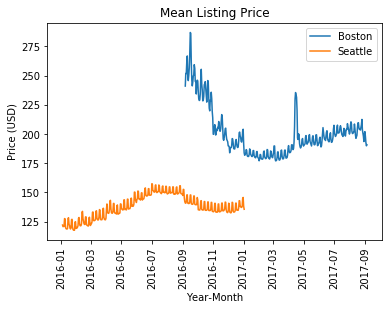

In [13]:
plt_Boston = cleaned_calender_Boston[['price','date']].groupby('date').mean()
plt.plot(plt_Boston, label = "Boston")

plt_Seattle = cleaned_calender_Seattle[['price','date']].groupby('date').mean()
plt.plot(plt_Seattle, label = "Seattle")

plt.title('Mean Listing Price')
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('Price (USD)')
plt.legend() 
plt.show()

### Conclusion:

For Boston and Seattle city, daily mean price versus the time is plotted. From the above plot, it is noted that for Seattle city, from january 2016 to july 2016 the price increased with respect to time and then it started decreasing with respect to time. For Boston city, from september 2016 to january 2017 the price decreased with time and then it started increasing with time. The price of boston is much larger than the price of Seattle.

### Question 2: What are the most important features which affect Airbnb rental price?</B>

### Question 3: What are important amenities people need the most?</B>




### Data Understanding: 
Boston dataset consists of 3585 listings and 95 features while Seattle's has 3818 listings and 92 features. Datasets have many missing values and are in improper format so before analysing it should be cleaned.

### Data Preparation:
Data preparation Includes data cleaning, filling NaN value or dropping column which has more number of missing values, one-hot encoding of categorical variables, converting boolean varables to numeric.


In [14]:
#drop columns which are not present in both the dataset
listings_Boston.drop(['access', 'interaction', 'house_rules'], axis = 1, inplace = True)

In [15]:
def cleaning(df):
    '''
    input: Dataset
    Output: Cleaned dataset by filling NaN, droping irrelevant columns, transforming data to relevant datatypes etc.
    
    '''
    # to remove high mising rate columns
    percentage_missing_data = df.isnull().sum() / df.shape[0]
    ax = percentage_missing_data.plot(kind = 'bar', color='red', figsize = (15, 5))
    ax.set_xlabel('Features')
    ax.set_ylabel('missing percent')
    plt.title('Missing value percentage Vs. Features')
    plt.show()
    
    
    # To remove missing percent >40%
    missing_above_40 = ['notes', 'square_feet', 'weekly_price','monthly_price', 'security_deposit',  'license']
    df.drop(missing_above_40, axis=1, inplace=True)
    
    # To find percentage of unique values 
    categories_object = df.columns[df.dtypes == 'object']
    percentage_unique = df[categories_object].nunique() / df.shape[0]
    ax = percentage_unique.plot(kind = 'bar', color='red', figsize = (15, 5))
    ax.set_xlabel('Features')
    ax.set_ylabel('Unique value Percent')
    plt.title('Unique value percentage Vs. Features')
    plt.show()
    
    # To reomove features that have a large number of unique values 
    large = ['listing_url', 'name','summary','space','description','neighborhood_overview',
          'transit', 'thumbnail_url', 'medium_url', 'picture_url','xl_picture_url', 'host_url', 
          'host_about','host_thumbnail_url', 'host_picture_url', 'street']# 'amenities']
    df.drop(large, axis=1, inplace=True)
    
    # reomove features that have very less unique value
    less_unique =['last_scraped','experiences_offered', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country','calendar_last_scraped', 'has_availability',
       'requires_license', 'jurisdiction_names']
    df.drop(less_unique, axis=1, inplace=True)
    
    df['price'].replace('[\$,]', '', regex=True, inplace=True)  
    df['price'] = df['price'].astype(float)
    
    df['cleaning_fee'] = df['cleaning_fee'].str.replace(',', '')
    df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '')
    df['cleaning_fee'] = df['cleaning_fee'].astype('float')
    
    
    # To convert boolean varables to numeric
    bool_cols =  ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic','is_location_exact',  'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']
    for column in bool_cols:
        df[column] = df[column].replace('f',0,regex=True)
        df[column] = df[column].replace('t',1,regex=True)
        
    #Fill the missing values in the numeric features with mean
    df_cleaned = df[['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic','is_location_exact','instant_bookable' ,
                         'require_guest_phone_verification',  'cleaning_fee','host_listings_count', 'host_total_listings_count', 'minimum_nights',
                     'bathrooms', 'bedrooms', 'guests_included', 'number_of_reviews','review_scores_rating', 'price']]
    for column in df_cleaned.columns[df_cleaned.isnull().any()]:
        df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mean())
        
    #get_dummies for categorical variables   
    for categorical in [ 'property_type', 'room_type', 'cancellation_policy', 'neighbourhood_cleansed', 'bed_type']:
        df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df[categorical])], axis=1)
        
        
    df.amenities = df.amenities.str.replace("[{}]", "").str.replace('"', "")
    unique_amenities = []
    for row in df.amenities:
        unique_amenities.extend(row.split(","))
    unique_amenities = set(unique_amenities)
    unique_amenities.remove('')
    if 'translation missing: en.hosting_amenity_49'in(unique_amenities):
        unique_amenities.remove('translation missing: en.hosting_amenity_49')
    if 'translation missing: en.hosting_amenity_50'in(unique_amenities):
        unique_amenities.remove('translation missing: en.hosting_amenity_50')
    
   
    # Function to split and return values for columns
    def split_amenities(val):
        try:
            if val.find(amenities) >-1:
                return 1
            else:
                return 0
        except AttributeError:
            return 0

    # Apply function for each ameneties
    for amenities in unique_amenities:        
        df_cleaned[amenities] = df['amenities'].apply(split_amenities)
    
    return df_cleaned, unique_amenities


### Data Modeling: 
The machine learning models are traned using Random Forest Algorithm for both cities.



In [16]:
def train(df, amenities):
    y = df['price']
    x = df.drop('price', axis =1)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

    #RandomForest model
    rf = RandomForestRegressor(criterion='mse', random_state=0)
    rf.fit(X_train, y_train)
    
    # predict using trained model
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
          
    # R2 score 
    rmse_rf= (mean_squared_error(y_test,y_test_pred))**(0.5)
    print('Random Forest RMSE test: %.3f' % rmse_rf)

    feature_importances = rf.feature_importances_
    features = sorted(zip(feature_importances, df.columns), reverse=True)
    attribute = []
    coefficient = []
    for feature in features:
        attribute.append(feature[1]) 
        coefficient.append(feature[0])
    plt.figure(figsize=(12,4))
    plt.bar(attribute[:10], height=coefficient[:10])
    plt.xticks(rotation=90)
    plt.xlabel('features')
    plt.ylabel('feature importance')
    plt.title('feature importance for the Top 10 features')
    plt.show()
        
    # Plot Amenity importance
    amenity= []
    amn_coef = []
    for feature in features:
        if feature[1] in amenities:
            amenity.append(feature[1])
            amn_coef.append(feature[0])
    plt.figure(figsize=(8,4))
    plt.bar(amenity[:10], height=amn_coef[:10])
    plt.xticks(rotation = 90)
    plt.xlabel('amenities')
    plt.ylabel('amenity importance')
    plt.title('amenity importance for the Top 10 amenities')
    plt.show()

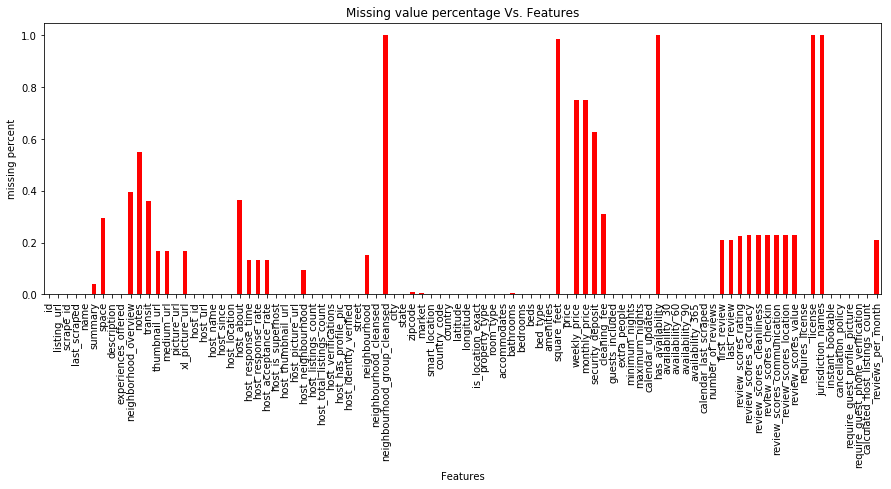

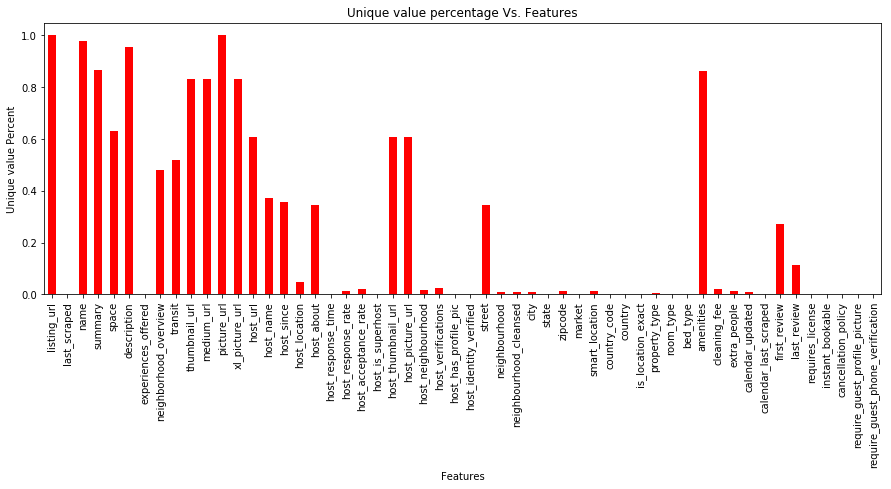

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
cleaned_boston, unique_amenities_boston = cleaning(listings_Boston)

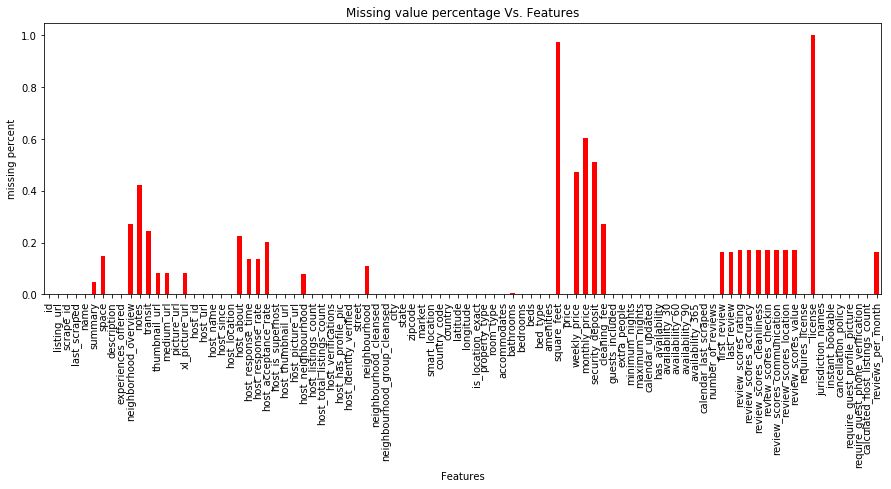

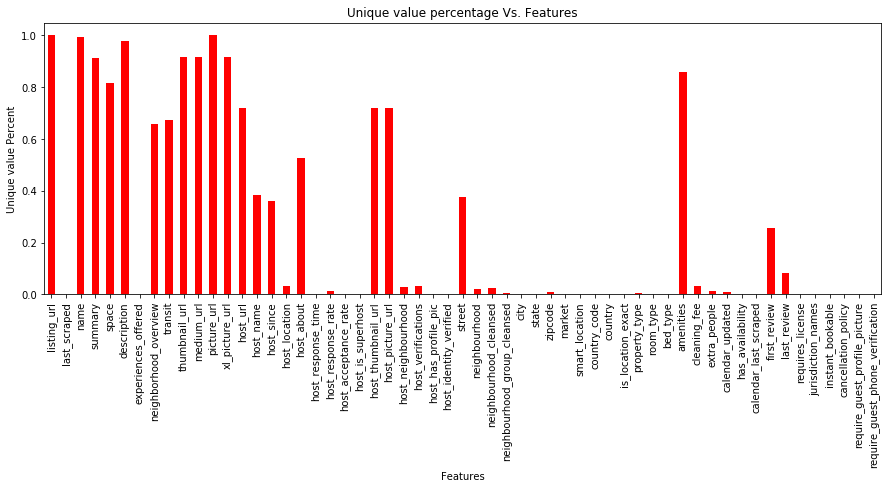

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
cleaned_seattle, unique_amenities_seattle = cleaning(listings_Seattle)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest RMSE test: 166.470


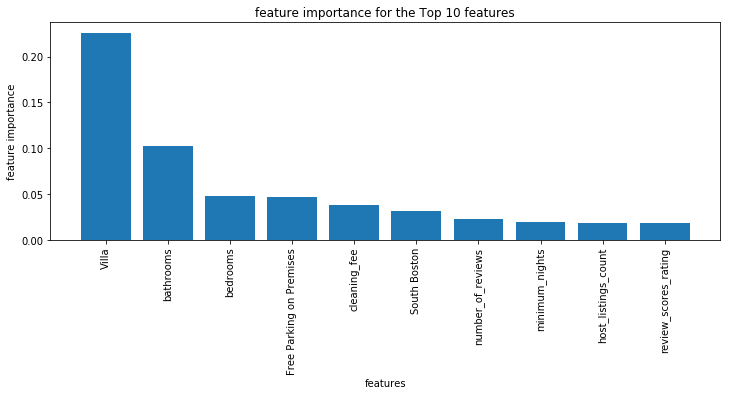

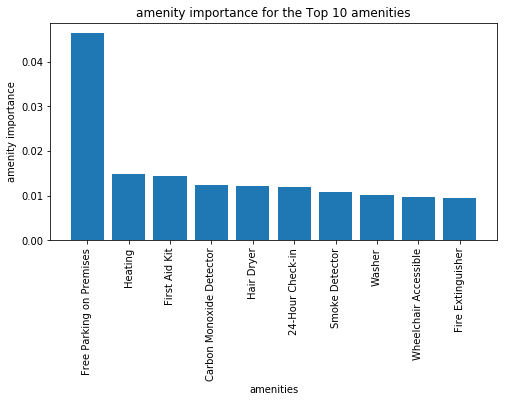

In [19]:
train(cleaned_boston, unique_amenities_boston)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest RMSE test: 59.030


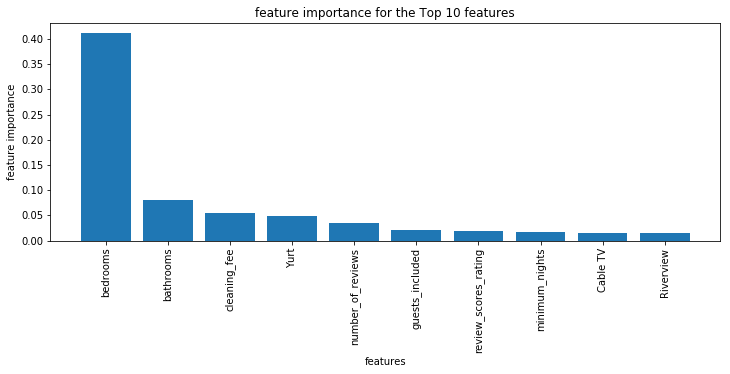

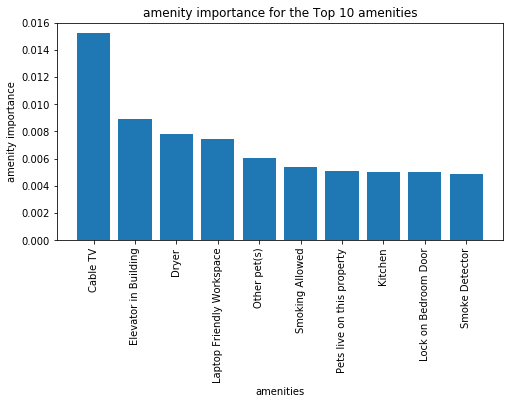

In [20]:
train(cleaned_seattle, unique_amenities_seattle)

### Conclusion:
The most deciding features for price is predicted for both the cities. According to the results, the most deciding features for both cities are mostly common and they are bathrooms, bedrooms, cleaning fee, number of reviews, review score rating, minimum nights, host total listing count, guest included. The most important amenities which people need the most are evaluted for both cities and they are iron, shampoo, hair dryer, pets allowed or not etc.